In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [70]:
# Informações do dataset
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [71]:
# Visualizando as 10 primeiras linhas do dataset
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [72]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [73]:
# Remover colunas desnecessárias
# Remover a coluna 'id_paciente', pois ela não é relevante para a análise
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [74]:
# Transforma a coluna 'genero' em numérica, usando conceito de one-hot encoding
# É necessário fazer isso para que o algoritmo de machine learning possa trabalhar com a coluna 'genero', que é categórica
# A função get_dummies do pandas faz essa transformação
# O parâmetro 'dtype' é usado para especificar o tipo de dado que será usado para representar as novas colunas
# Nesse caso, estamos usando 'int64', que é um tipo de dado inteiro de 64 bits
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [75]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

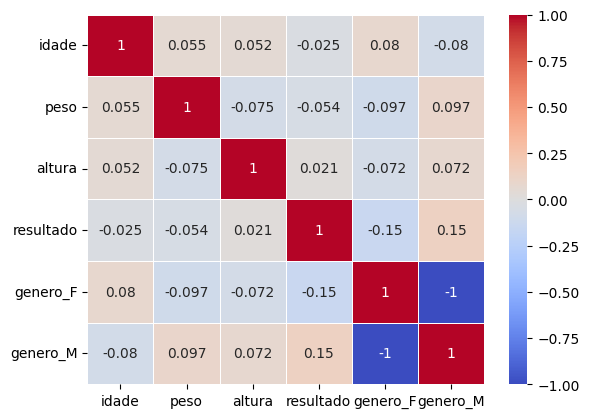

In [76]:
# Apresentar mapa de calor para visualizar a correlação entre as variáveis
# O mapa de calor é uma forma visual de representar a matriz de correlação, onde cada célula é colorida de acordo com o valor da correlação
# Quanto mais próximo de 1, mais forte é a correlação positiva, e quanto mais próximo de -1, mais forte é a correlação negativa
# Valores próximos de 0 indicam uma correlação fraca ou inexistente
# A função heatmap do seaborn é usada para criar o mapa de calor
# O parâmetro 'annot' é usado para exibir os valores de correlação nas células
# O parâmetro 'cmap' é usado para especificar a paleta de cores que será usada para colorir as células
# O parâmetro 'linewidths' é usado para especificar a largura das linhas que separam as células
# O parâmetro 'vmin' é usado para especificar o valor mínimo que será usado para colorir as células
# O parâmetro 'vmax' é usado para especificar o valor máximo que será usado para colorir as células
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

Podemos perceber que não há nenhuma correlação muito forte entre as variaveis (features) apresentadas

<Axes: >

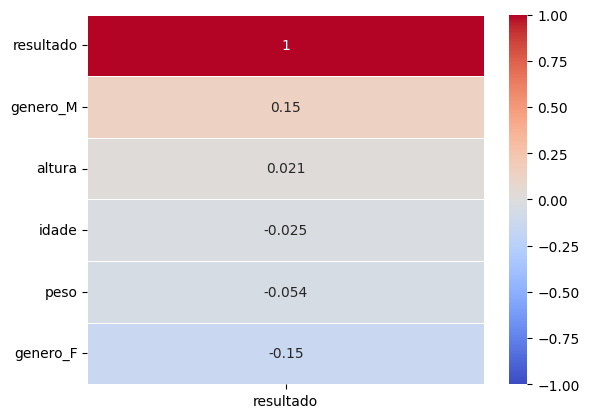

In [77]:
# Mapa de correlação só com a váriavel de target ou de interesse (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


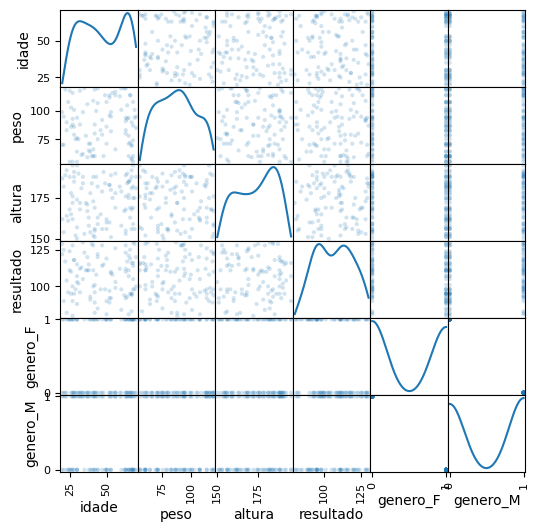

In [78]:
# Plot scatter (dispersão) com distribuição das variáveis
# A função scatter_matrix do pandas é usada para criar um gráfico de dispersão para cada par de variáveis no dataset
# O parâmetro 'alpha' é usado para especificar a transparência dos pontos no gráfico de dispersão
# O parâmetro 'figsize' é usado para especificar o tamanho da figura
# O parâmetro 'diagonal' é usado para especificar o tipo de gráfico que será exibido na diagonal principal
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

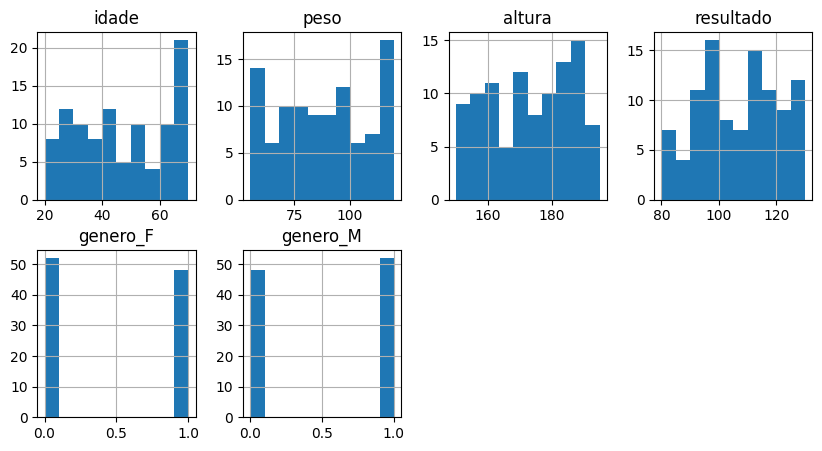

In [79]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10, 5))

In [80]:
# Criar feature de IMC (índice de massa corporal) usando a fórmula: IMC = peso / (altura^2)
# A função apply do pandas é usada para aplicar uma função a cada valor de uma coluna
# A função lambda é usada para criar uma função anônima que calcula o IMC
df_exames['imc'] = df_exames.apply(lambda row: row['peso'] / ((row['altura'] / 100) ** 2), axis=1)

In [81]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


<Axes: >

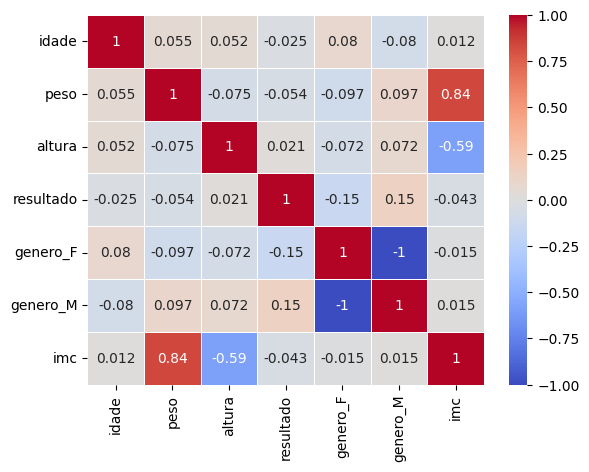

In [82]:
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

A nova feature (IMC) também não apresenta uma forte correlação com a váriavel target (resultado)

In [83]:
# Importar lib do sklearn
# O sklearn é uma biblioteca de machine learning para Python que fornece várias ferramentas e algoritmos para facilitar o desenvolvimento de modelos de machine learning
# A classe LinearRegression do sklearn é usada para criar um modelo de regressão linear
# A função train_test_split do sklearn é usada para dividir o dataset em conjuntos de treinamento e teste
# A função mean_squared_error do sklearn é usada para calcular o erro médio quadrático entre os valores reais e previstos
# A função r2_score do sklearn é usada para calcular o coeficiente de determinação (R²) entre os valores reais e previstos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [84]:
# Modelo 1 - Sem IMC
# X = variáveis independentes (features)
# y = variável dependente (resultado)
X = df_exames.drop(columns=['resultado', 'imc'], axis=1)
y = df_exames['resultado']

In [85]:
# Dividir o dataset em conjuntos de treinamento e teste
# O parâmetro 'test_size' é usado para especificar a proporção do dataset que será usada para teste
# Nesse caso, estamos usando 30% do dataset para teste e 70% para treinamento
# O parâmetro 'random_state' é usado para especificar a semente do gerador de números aleatórios
# Isso garante que a divisão do dataset seja sempre a mesma, o que é útil para fins de reprodução
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [86]:
# Treinar o algoritmo de regressão linear - Modelo 1
# A função fit do sklearn é usada para treinar o modelo de regressão linear
# O parâmetro 'X_train' é usado para especificar as variáveis independentes de treinamento
# O parâmetro 'y_train' é usado para especificar a variável dependente de treinamento
model1 = LinearRegression().fit(X_train, y_train)

In [87]:
# Gerar predições para o conjunto de teste - Modelo 1
# A função predict do sklearn é usada para gerar predições com base no modelo treinado
y_pred1 = model1.predict(X_test)

In [88]:
# Resultados da predição - Modelo 1
y_pred1

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [89]:
# Equação da reta - Regressão linear
# A equação da reta é uma forma de representar um modelo de regressão linear
# Ela é usada para descrever a relação entre as variáveis independentes e a variável dependente
# No caso de um modelo de regressão linear simples, a equação da reta é dada por: y = ax + b
# Onde:
# - y é a variável dependente
# - x é a variável independente
# - a é o coeficiente angular, que representa a taxa de variação de y em relação a x
# - b é o coeficiente linear, que representa o valor de y quando x é igual a 0
model1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [90]:
# O coeficiente linear (b) é obtido através do atributo 'intercept_' do modelo
model1.intercept_

np.float64(94.21133142019876)

In [91]:
# Métricas R2 Score - Modelo 1
# O coeficiente de determinação (R²) é uma métrica usada para avaliar a qualidade de um modelo de regressão
# Ele varia de 0 a 1, onde 0 indica que o modelo não explica a variabilidade dos dados e 1 indica que o modelo explica toda a variabilidade dos dados
# Quanto maior o valor de R², melhor é o ajuste do modelo aos dados
# A função r2_score do sklearn é usada para calcular o coeficiente de determinação
model1.score(X_train, y_train)

0.06218388634297234

In [92]:
model1.score(X_test, y_test)

-0.13640904479106397

Esses valores resultantes indicam que o modelo não performou bem, nem no treinamento nem nos testes, gerando caracteristicas de underfit

In [93]:
# Métricas R2 Score usando lib - Modelo 1
# A função r2_score do sklearn é usada para calcular o coeficiente de determinação
r2_score(y_test, y_pred1)

-0.13640904479106397

In [94]:
# Métrica MAE (Mean Absolute Error) - Modelo 1
# O MAE é uma métrica usada para avaliar a qualidade de um modelo de regressão
# Ele mede a diferença média entre os valores reais e previstos
# Quanto menor o valor do MAE, melhor é o ajuste do modelo aos dados
# A função mean_absolute_error do sklearn é usada para calcular o MAE
mean_absolute_error(y_test, y_pred1)

np.float64(12.695569181179541)

O resultado indica que o erro médio do modelo é de 12,69 mg/dl, um erro consideravelmente alto

In [95]:
# Modelo 2 - Com apenas IMC
X2 = pd.DataFrame(df_exames['imc'])
y2 = df_exames['resultado']

In [96]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, random_state=51)

In [97]:
model2 = LinearRegression().fit(X2_train, y2_train)

In [98]:
y_pred2 = model2.predict(X2_test)

In [99]:
y_pred2

array([102.73796795, 107.63459815, 108.58489716, 105.70201829,
       103.49767627, 108.73954738, 106.19637687, 108.30118863,
       107.77627304, 106.26623629, 108.10220438, 108.18040704,
       107.64653815, 104.90037915, 101.0377542 , 105.66044363,
       104.93184853, 109.01470939, 105.54141413, 103.46672578,
       105.42716889, 108.77686903, 107.65316149, 104.46837648,
       105.02409479, 105.70201829, 102.84895739, 108.11389027,
       107.77143433, 103.72326007])

In [100]:
model2.coef_

array([-0.21677589])

In [101]:
model2.intercept_

np.float64(112.15019229088837)

In [102]:
model2.score(X2_train, y2_train)

0.015285962664806862

In [103]:
model2.score(X2_test, y2_test)

-0.08898328562401758

In [104]:
r2_score(y2_test, y_pred2)

-0.08898328562401758

In [105]:
mean_absolute_error(y2_test, y_pred2)

np.float64(12.5056514070601)

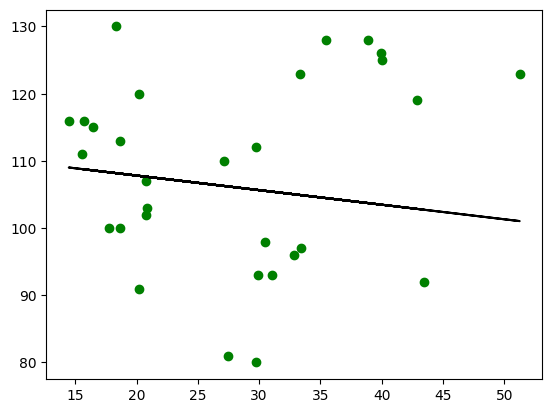

In [106]:
# Como o modelo é uma regressão simples, podemos plotar a reta de regressão no gráfico de dispersão
plt.scatter(X2_test, y2_test, color='g')
plt.plot(X2_test, y_pred2, color='k')